<a href="https://colab.research.google.com/github/ChonnaveeSuk/bachelor-thesis-project/blob/main/Project_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load and Clean Data

In [ ]:
!pip install pmdarima
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy.interpolate import interp1d
from sklearn.svm import SVR
from pandas.plotting import autocorrelation_plot , lag_plot
from scipy.stats import gaussian_kde
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
from termcolor import colored as cl

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import statsmodels.api as sm

#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00


In [ ]:
#Load Data
data = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ข้อมูลย้อนหลังของ ดัชนี SET 50 เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
data = data.sort_values('date')

In [ ]:
#create a new column with the target variable (shifted one day)
data['SET50(-1)'] = data['SET50'].shift(1)
#drop the last row with NaN values
data = data.dropna()

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ข้อมูลย้อนหลังของ ดัชนี Dow Jones Industrial Average เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
df2 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ราคาย้อนหลังของ สัญญาซื้อขายล่วงหน้าน้ำมันดิบ WTI เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
df3 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/อัตราแลกเปลี่ยนย้อนหลัง USD_THB เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
df4 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ราคาย้อนหลังของ สัญญาซื้อขายล่วงหน้าทองคำ เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
df6 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ราคาย้อนหลังของสัญญาซื้อขายล่วงหน้า Hang Seng เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
df7 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ราคาย้อนหลังของสัญญาซื้อขายล่วงหน้า Nikkei 225 เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
df8 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ข้อมูลย้อนหลังของ ดัชนี Jakarta Stock Exchange Composite เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
df9 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ข้อมูลย้อนหลังของ ดัชนี PSEi Composite เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
df10 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ข้อมูลย้อนหลังของ ดัชนี S&P Merval เพิ่มเวลา.xlsx', index_col='date', parse_dates=True)
df11 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ราคาย้อนหลัง หุ้น STI.xlsx', index_col='date', parse_dates=True)
df12 = pd.read_excel('/content/drive/MyDrive/Data_Thesis/long time/ข้อมูลย้อนหลังของ ดัชนี FTSE Malaysia KLCI.xlsx', index_col='date', parse_dates=True)

In [ ]:
#select date
data = data[(data.index >= '2563-01-01 00:00:00') & (data.index <= '2566-04-20 00:00:00')]
df1 = df1[(df1.index >= '2563-01-01 00:00:00') & (df1.index <= '2566-04-20 00:00:00')]
df2 = df2[(df2.index >= '2563-01-01 00:00:00') & (df2.index <= '2566-04-20 00:00:00')]
df3 = df3[(df3.index >= '2563-01-01 00:00:00') & (df3.index <= '2566-04-20 00:00:00')]
df4 = df4[(df4.index >= '2563-01-01 00:00:00') & (df4.index <= '2566-04-20 00:00:00')]
df6 = df6[(df6.index >= '2563-01-01 00:00:00') & (df6.index <= '2566-04-20 00:00:00')]
df7 = df7[(df7.index >= '2563-01-01 00:00:00') & (df7.index <= '2566-04-20 00:00:00')]
df8 = df8[(df8.index >= '2563-01-01 00:00:00') & (df8.index <= '2566-04-20 00:00:00')]
df9 = df9[(df9.index >= '2563-01-01 00:00:00') & (df9.index <= '2566-04-20 00:00:00')]
df10 = df10[(df10.index >= '2563-01-01 00:00:00') & (df10.index <= '2566-04-20 00:00:00')]
df11 = df11[(df11.index >= '2563-01-01 00:00:00') & (df11.index <= '2566-04-20 00:00:00')]
df12 = df12[(df12.index >= '2563-01-01 00:00:00') & (df12.index <= '2566-04-20 00:00:00')]
#merged data
merged_data = pd.merge(df1, df2, on='date', how='inner')
merged_data = pd.merge(merged_data, df3, on='date', how='inner')
merged_data = pd.merge(merged_data, df4, on='date', how='inner')
merged_data = pd.merge(merged_data, df6, on='date', how='inner')
merged_data = pd.merge(merged_data, df7, on='date', how='inner')
merged_data = pd.merge(merged_data, df8, on='date', how='inner')
merged_data = pd.merge(merged_data, df9, on='date', how='inner')
merged_data = pd.merge(merged_data, df10, on='date', how='inner')
merged_data = pd.merge(merged_data, df11, on='date', how='inner')
merged_data = pd.merge(merged_data, df12, on='date', how='inner')
merged_data = pd.merge(data, merged_data, on='date', how='inner')
# Clean data
merged_data.dropna(inplace=True)

StandardScaler and PCA

In [ ]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
X_columns = ['SET50(-1)', 'Dow Jones', 'WTI', 'USD', 'GOLD', 'Hang', 'Nik',
       'JKSE', 'PSEI', 'MERVAL', 'STI', 'FTSE']
scaler = StandardScaler()
scaler.fit(merged_data[X_columns])
X_scaled = scaler.transform(merged_data[X_columns])
#PCA feature
from sklearn.decomposition import PCA
pca = PCA(n_components = 12)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
#create dataframe (PCA+SET50)
correlation_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6', 'PC7', 'PC8','PC9','PC10','PC11','PC12'])
correlation_df['SET50'] = merged_data['SET50'].values

#ARIMAX

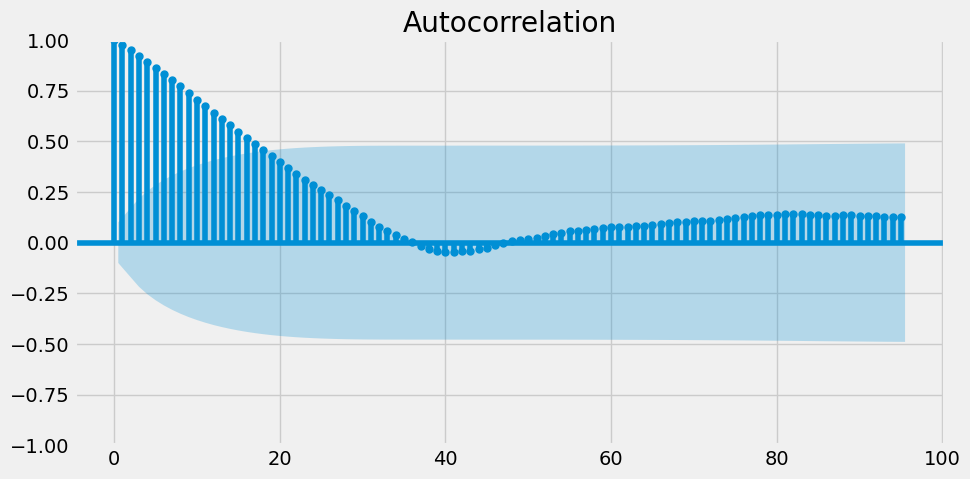

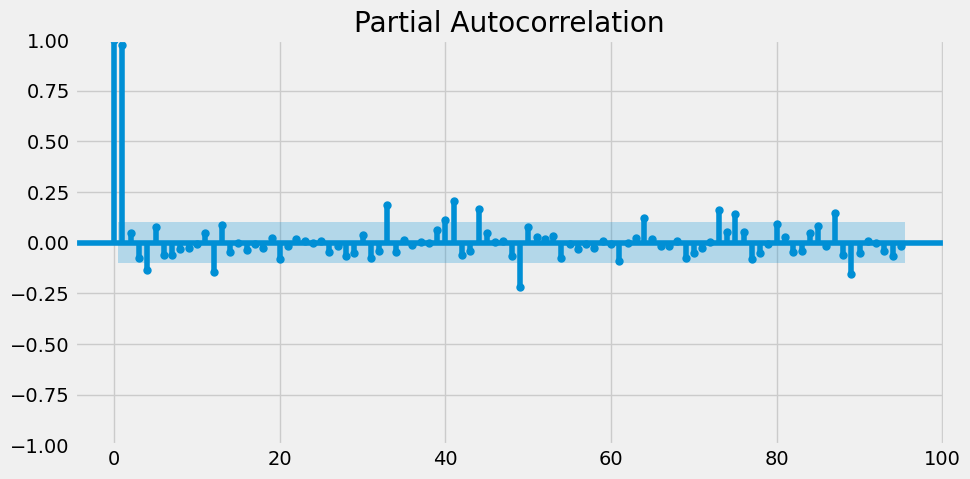

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot ACF & PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(merged_data['SET50'][:380], lags=95, ax=ax)
plt.show()

# plot partial autocorrelation function
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(merged_data['SET50'][:380], lags=95, ax=ax)
plt.show()

In [ ]:
#Auto arima to find optimal Model
model = pm.auto_arima(merged_data['SET50'][:380],
                      test='adf',
                      seasonal=True,
                      m=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3137.437, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4368.995, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3143.527, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3940.794, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6270.864, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3137.306, Time=0.50 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3713.956, Time=0.50 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3144.420, Time=0.34 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3135.699, Time=0.55 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=3529.566, Time=0.57 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3133.381, Time=0.63 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3135.647, Time=1.16 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=3135.359, Time=1.26 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=3134.535, Time=0.76 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept

In [ ]:
#Split Data Train-Test
train = correlation_df[['PC1', 'PC2', 'PC3', 'PC5']]
test = correlation_df['SET50']

X_train = train[:380]
y_train = test[:380]
X_test = train[380:500]
y_test = test[380:500]
X_val_ = train[500:]
y_val_test_ = test[500:]

In [ ]:
model = sm.tsa.ARIMA(y_train ,exog = X_train, order=(2,0,2), seasonal_order=(0,0,0,0))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  SET50   No. Observations:                  380
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1449.433
Date:                Tue, 16 May 2023   AIC                           2918.866
Time:                        13:41:21   BIC                           2958.267
Sample:                             0   HQIC                          2934.500
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        937.5339     35.239     26.605      0.000     868.467    1006.601
PC1           -9.6185      2.825     -3.405      0.001     -15.155      -4.082
PC2          -33.9232      2.183    -15.537      0.000     -38.203     -29.644
PC3            7.7357      2.165      3.573      0.000       3.492      11.979
PC5          -14.6701      3.501     -4.191      0.000     -21.531      -7.809
ar.L1          0.0933      0.036      2.572      0.010       0.022       0.164
ar.L2          0.8858      0.035     25.272      0.000       0.817       0.955
ma.L1          0.6317      0.048     13.046      0.000       0.537       0.727
ma.L2         -0.3302      0.037     -9.041      0.000      -0.402      -0.259
sigma2       118.2637      4.959     23.848      0.000     108.544     127.983
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               442.11
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

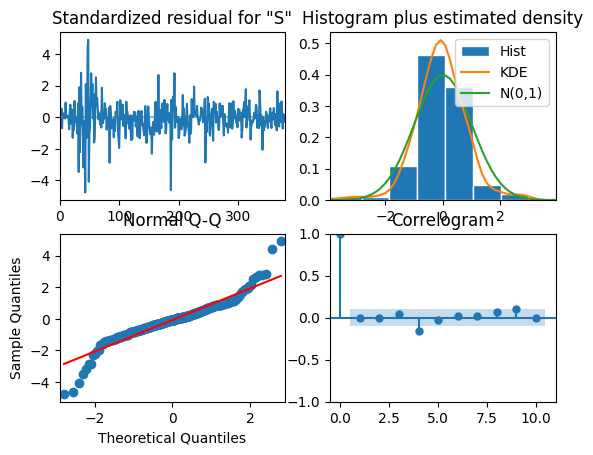

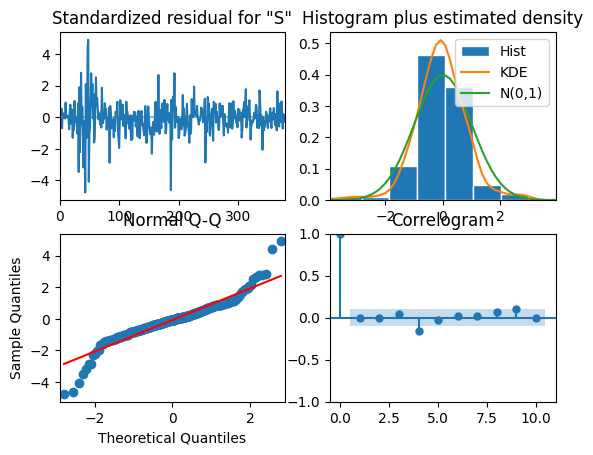

In [ ]:
results.plot_diagnostics()

In [ ]:
forecast = results.forecast(steps=120,exog = X_test)
merged_data['Forecast_ARIMA'] = np.nan
merged_data['Forecast_ARIMA'][:380] = results.predict()
merged_data['Forecast_ARIMA'][380:500] = forecast

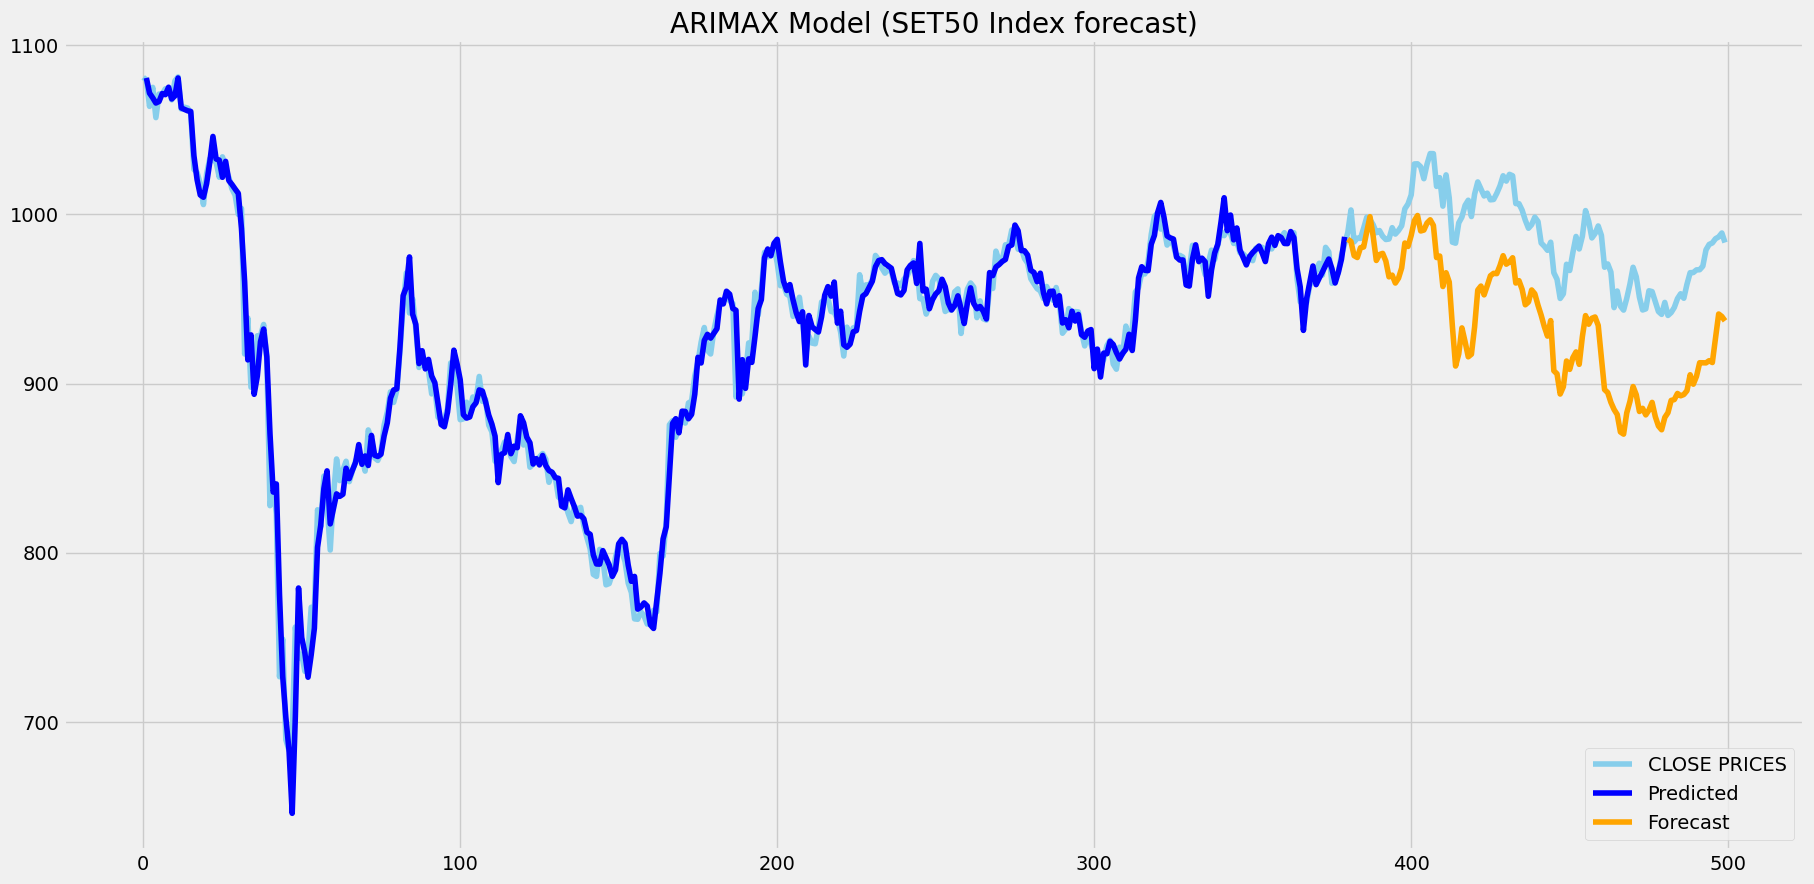

In [ ]:
merged_data1 = merged_data.reset_index()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data1['SET50'][:500].plot(label = 'CLOSE PRICES', color = 'skyblue')
merged_data1['Forecast_ARIMA'][1:380].plot(label = 'Predicted', color = 'blue')
merged_data1['Forecast_ARIMA'][380:500].plot(label = 'Forecast', color = 'orange')

plt.legend(loc = 'lower right')
plt.title('ARIMAX Model (SET50 Index forecast)')
plt.show()

In [ ]:
mape = MAPE(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA'][380:500])
rmse = np.sqrt(mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA'][380:500]))
mse = mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA'][380:500])
mae = mean_absolute_error(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA'][380:500])
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

RMSE: 53.9357
MSE: 2909.0554
MAE: 50.2114
MAPE: 5.1149


#SVR

In [ ]:
from sklearn.model_selection import GridSearchCV
#split data
train = correlation_df[['PC1', 'PC2', 'PC3', 'PC5', 'PC7', 'PC8']]
test = correlation_df['SET50']
X_train = train[:380]
y_train = test[:380]
X_test = train[380:500]
y_test = test[380:500]
X_val = train[500:]
y_val_test = test[500:]

# Define the range of hyperparameters to search over
param_grid = {
    'kernel' : ['rbf','linear'],
    'gamma' : ['auto','scale'],
    'C': [1,5,10,25,30,35,50,60,65,70,75,80,85,100,400,800,1500,2500,3500],
    'epsilon': [1e-5,1e-4,1e-3,1e-2,5e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.99]
}

# Use GridSearchCV to find the best hyperparameters
svm_grid = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
svm_grid.fit(X_train,y_train)

# Train an SVM model with the best hyperparameters
svm_best = SVR(kernel=svm_grid.best_params_['kernel'], C=svm_grid.best_params_['C'], gamma=svm_grid.best_params_['gamma'],
               epsilon=svm_grid.best_params_['epsilon'])
svm_best.fit(X_train,y_train)

# Generate predictions using the SVM model
y_pred_svr = svm_best.predict(X_test)
merged_data['Forecast_SVR'] = np.nan
merged_data['Forecast_SVR'][380:500] = y_pred_svr
y_pred_svr_t = svm_best.predict(X_train)
merged_data['Forecast_SVR'][:380] = y_pred_svr_t

In [ ]:
#Best SVR Model
svm_grid.best_params_

{'C': 5, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}

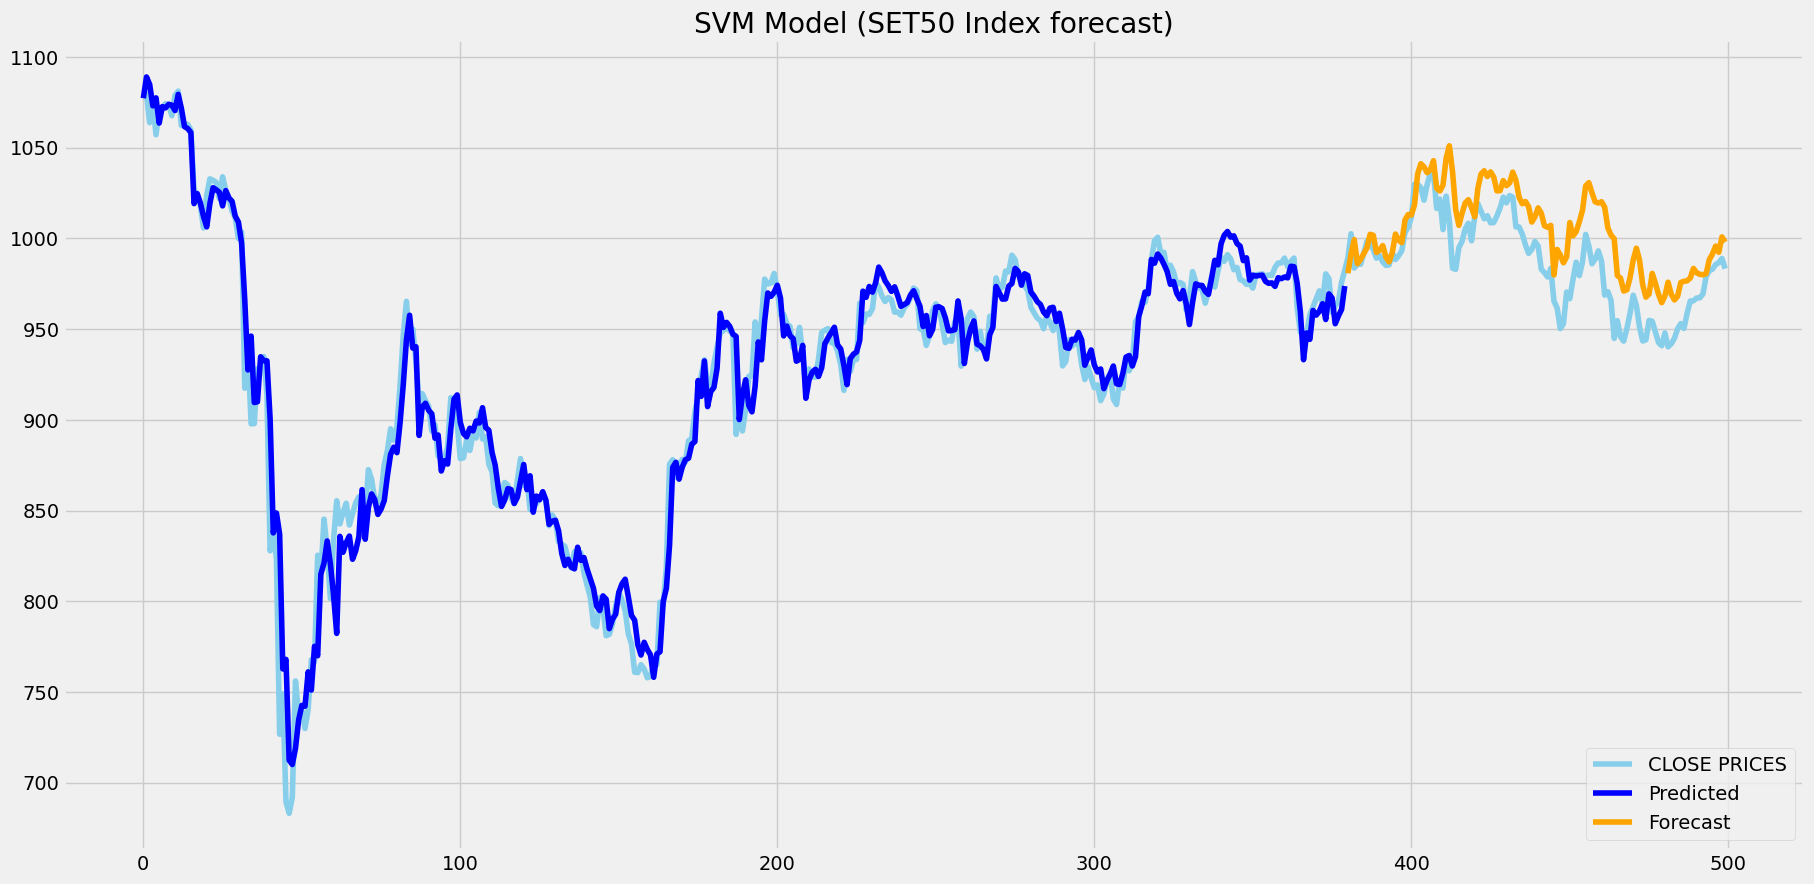

In [ ]:
merged_data1 = merged_data.reset_index()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data1['SET50'][:500].plot(label = 'CLOSE PRICES', color = 'skyblue')
merged_data1['Forecast_SVR'][:380].plot(label = 'Predicted', color = 'blue')
merged_data1['Forecast_SVR'][380:500].plot(label = 'Forecast', color = 'orange')

plt.legend(loc = 'lower right')
plt.title('SVM Model (SET50 Index forecast)')
plt.show()

In [ ]:
mape = MAPE(merged_data['SET50'][380:500], merged_data['Forecast_SVR'][380:500])
rmse = np.sqrt(mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_SVR'][380:500]))
mse = mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_SVR'][380:500])
mae = mean_absolute_error(merged_data['SET50'][380:500], merged_data['Forecast_SVR'][380:500])
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

RMSE: 22.2173
MSE: 493.6095
MAE: 18.7677
MAPE: 1.9191


#ANN

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

def FunctionFindBestParams(X_train, y_train, X_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    units_list = [10,20,50,80,100]


    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Hidden Layer','Batch','Epoch', 'MSE_train','MSE_test'])

    # initializing the trials
    TrialNumber=0
    for batch_trial in batch_size_list:
      for epochs_trial in epoch_list:
        for units_trial in units_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units_trial, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units_trial, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)

            MSE_test = mean_squared_error(y_test,model.predict(X_test))
            MSE_train = mean_squared_error(y_train,model.predict(X_train))


            # printing the results of the current iteration
            # print(TrialNumber, 'Parameters:','Neuron:', units_trial,'-', 'batch:' ,batch_trial, '-' ,'epochs:',epochs_trial, 'Accuracy:', MSE_test )

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, '6'+'-'+str(units_trial)+'-'+str(units_trial)+'-'+'1',batch_trial,epochs_trial, MSE_train,MSE_test]],
                                                                    columns=['TrialNumber', 'Hidden Layer','Batch','Epoch', 'MSE_train','MSE_test'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train.values, y_train.values, X_test.values, y_test.values)

In [ ]:
#Best ANN Model
ResultsData[(ResultsData['MSE_train']==min(ResultsData['MSE_train']))]

,TrialNumber,Hidden Layer,Batch,Epoch,MSE_train,MSE_test
0,18,6-50-50-1,5,100,191.157358,206.284468


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(50, input_dim=6, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
#model.add(Dense(20, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam' , metrics=['accuracy'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train , validation_data=(X_test, y_test) ,batch_size = 5, epochs = 100, verbose=0)

# Predict
y_pred_ann = model.predict(X_test)
y_pred_ann_t = model.predict(X_train)
merged_data['Forecast_ANN'] = np.nan
merged_data['Forecast_ANN'][380:500] = y_pred_ann.reshape(120,)
merged_data['Forecast_ANN'][:380] = y_pred_ann_t.reshape(380,)

12/12 [==============================] - 0s 2ms/step


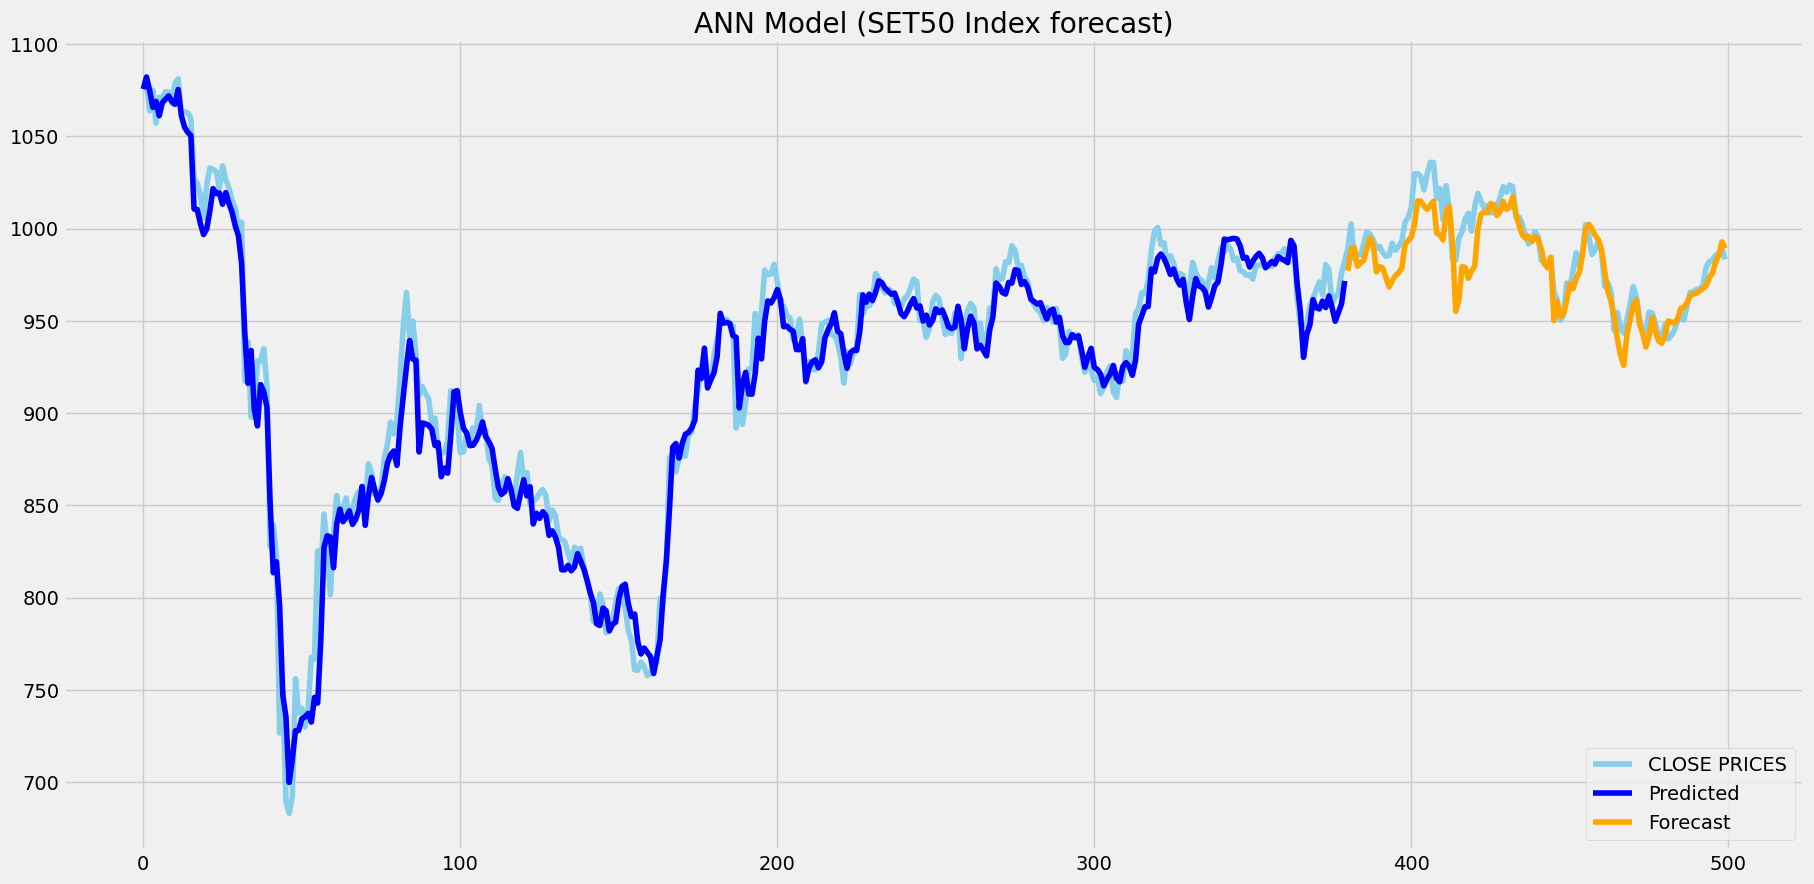

In [ ]:
merged_data1 = merged_data.reset_index()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data1['SET50'][:500].plot(label = 'CLOSE PRICES', color = 'skyblue')
merged_data1['Forecast_ANN'][:380].plot(label = 'Predicted', color = 'blue')
merged_data1['Forecast_ANN'][380:500].plot(label = 'Forecast', color = 'orange')

plt.legend(loc = 'lower right')
plt.title('ANN Model (SET50 Index forecast)')
plt.show()

In [ ]:
mape = MAPE(merged_data['SET50'][380:500], merged_data['Forecast_ANN'][380:500])
rmse = np.sqrt(mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_ANN'][380:500]))
mse = mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_ANN'][380:500])
mae = mean_absolute_error(merged_data['SET50'][380:500], merged_data['Forecast_ANN'][380:500])
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

RMSE: 11.7598
MSE: 138.2925
MAE: 8.9337
MAPE: 0.8992


#ARIMA + SVR

In [ ]:
#y_train, y_train = residual
y_train_res = results.resid.values
y_test_res =  merged_data['SET50'][380:500] - merged_data['Forecast_ARIMA'][380:500]

In [ ]:
# Define the range of hyperparameters to search over
param_grid = {
    'kernel' : ['rbf','linear'],
    'C': [1,5,10,25,30,35,50,60,65,70,75,80,85,100,400,800,1500,2500,3500],
    'gamma': ['scale','auto'],
    'epsilon': [1e-5,1e-4,1e-3,1e-2,5e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.99]
}

# Use GridSearchCV to find the best hyperparameters
svm_grid = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
svm_grid.fit(X_train, y_train_res)

# Train an SVM model with the best hyperparameters
svm_best = SVR(kernel=svm_grid.best_params_['kernel'], C=svm_grid.best_params_['C'], gamma=svm_grid.best_params_['gamma'],
               epsilon=svm_grid.best_params_['epsilon'])
svm_best.fit(X_train, y_train_res)

# Generate predictions using the SVM model
y_pred_svr_res = svm_best.predict(X_test)
y_pred_svr_res_t = svm_best.predict(X_train)
y_pred_arima_svr = forecast + y_pred_svr_res

merged_data['Forecast_ARIMA_SVR'] = np.nan
y_pred_arima_svr_t = results.predict() + y_pred_svr_res_t
merged_data['Forecast_ARIMA_SVR'][:380] = results.predict()
merged_data['Forecast_ARIMA_SVR'][380:500] = y_pred_arima_svr

In [ ]:
#Best ARIMAX-SVR Model
svm_grid.best_params_

{'C': 5, 'epsilon': 0.05, 'gamma': 'scale', 'kernel': 'linear'}

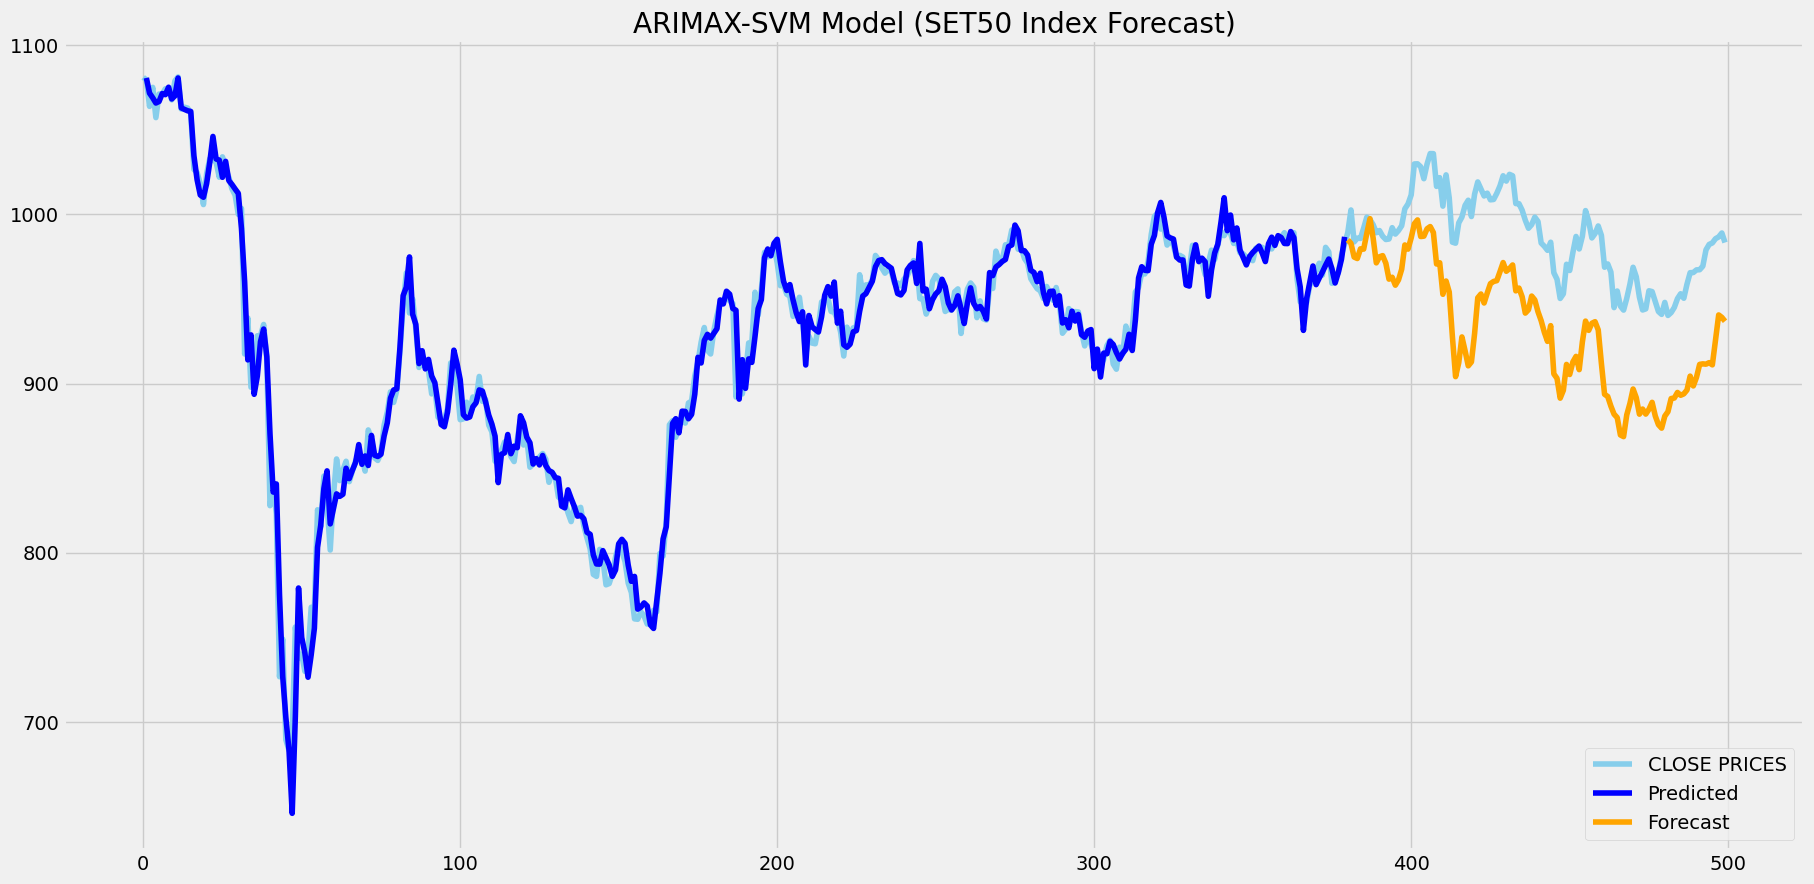

In [ ]:
merged_data1 = merged_data.reset_index()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data1['SET50'][:500].plot(label = 'CLOSE PRICES', color = 'skyblue')
merged_data1['Forecast_ARIMA_SVR'][1:380].plot(label = 'Predicted', color = 'blue')
merged_data1['Forecast_ARIMA_SVR'][380:500].plot(label = 'Forecast', color = 'orange')

plt.legend(loc = 'lower right')
plt.title('ARIMAX-SVM Model (SET50 Index Forecast)')
plt.show()

In [ ]:
mape = MAPE(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA_SVR'][380:500])
rmse = np.sqrt(mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA_SVR'][380:500]))
mse = mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA_SVR'][380:500])
mae = mean_absolute_error(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA_SVR'][380:500])
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

RMSE: 56.2281
MSE: 3161.5969
MAE: 52.5152
MAPE: 5.3456


#ARIMA + ANN

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

def FunctionFindBestParams(X_train, y_train, X_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    units_list = [10,20,50,80,100]


    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Hidden Layer','Batch','Epoch', 'MSE_train','MSE_test'])

    # initializing the trials
    TrialNumber=0
    for batch_trial in batch_size_list:
      for epochs_trial in epoch_list:
        for units_trial in units_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units_trial, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units_trial, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train_res ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)

            MSE_test = mean_squared_error(y_test_res,model.predict(X_test))
            MSE_train = mean_squared_error(y_train_res,model.predict(X_train))


            # printing the results of the current iteration
            # print(TrialNumber, 'Parameters:','Neuron:', units_trial,'-', 'batch:' ,batch_trial, '-' ,'epochs:',epochs_trial, 'Accuracy:', MSE_test )

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, '6'+'-'+str(units_trial)+'-'+str(units_trial)+'-'+'1',batch_trial,epochs_trial, MSE_train,MSE_test]],
                                                                    columns=['TrialNumber', 'Hidden Layer','Batch','Epoch', 'MSE_train','MSE_test'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train.values, y_train.values, X_test.values, y_test.values)

In [ ]:
#Best ARIMAX-ANN Model
ResultsData[(ResultsData['MSE_train']==min(ResultsData['MSE_train']))]

,TrialNumber,Hidden Layer,Batch,Epoch,MSE_train,MSE_test
0,20,6-100-100-1,5,100,88.617072,2941.082014


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(100, input_dim=6, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
model.add(Dense(100, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam' , metrics=['accuracy'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train_res  ,batch_size = 5, epochs = 100, verbose=0)

# Predict
y_pred_ann_res = model.predict(X_test)
y_pred_ann_t_res = model.predict(X_train)
y_pred_arima_ann = forecast + y_pred_ann_res.reshape(120,)
y_pred_arima_ann_t = results.predict() + y_pred_ann_t_res.reshape(380,)

merged_data['Forecast_ARIMA_ANN'] = np.nan
merged_data['Forecast_ARIMA_ANN'][:380] = y_pred_arima_ann_t
merged_data['Forecast_ARIMA_ANN'][380:500] = y_pred_arima_ann

12/12 [==============================] - 0s 2ms/step


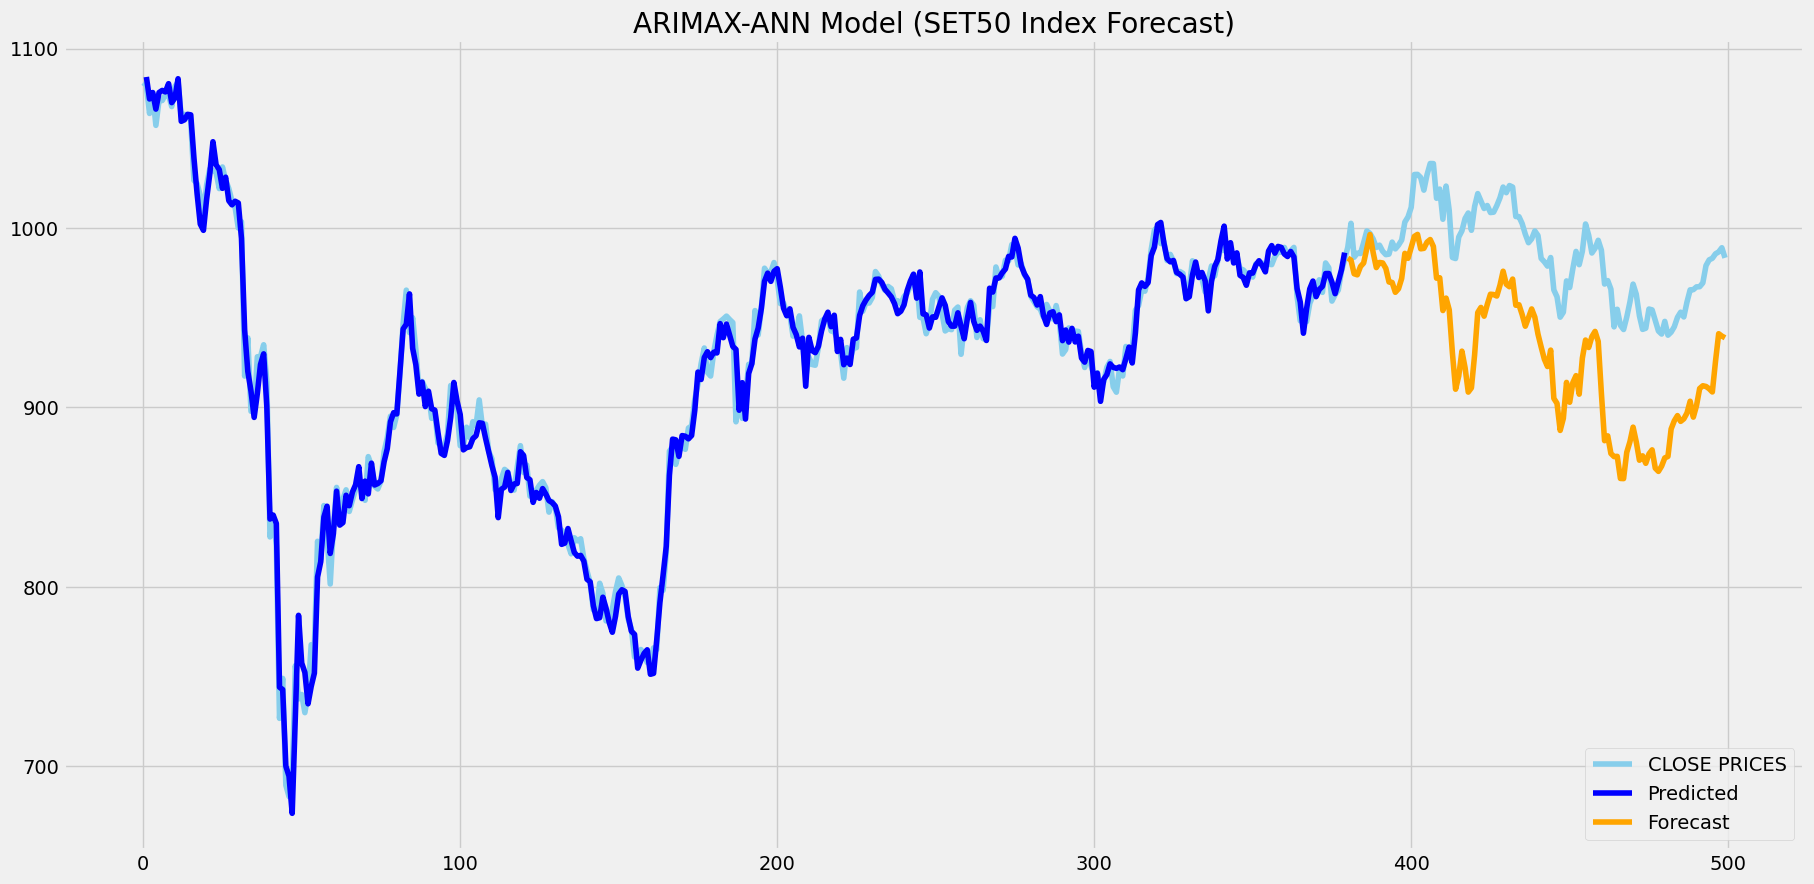

In [ ]:
merged_data1 = merged_data.reset_index()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data1['SET50'][:500].plot(label = 'CLOSE PRICES', color = 'skyblue')
merged_data1['Forecast_ARIMA_ANN'][1:380].plot(label = 'Predicted', color = 'blue')
merged_data1['Forecast_ARIMA_ANN'][380:500].plot(label = 'Forecast', color = 'orange')

plt.legend(loc = 'lower right')
plt.title('ARIMAX-ANN Model (SET50 Index Forecast)')
plt.show()

In [ ]:
mape = MAPE(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA_ANN'][380:500])
rmse = np.sqrt(mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA_ANN'][380:500]))
mse = mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA_ANN'][380:500])
mae = mean_absolute_error(merged_data['SET50'][380:500], merged_data['Forecast_ARIMA_ANN'][380:500])
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

RMSE: 57.9016
MSE: 3352.5930
MAE: 53.2638
MAPE: 5.4299


#Comblined Model

In [ ]:
from scipy.optimize import minimize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Define a function to compute the RMSE of the combined forecast
def combined_rmse(weights):
    weights = weights / np.sum(weights)  # normalize the weights
    arima_pred = merged_data['Forecast_ARIMA'][:500]
    svm_pred = merged_data['Forecast_SVR'][:500]
    ann_pred = merged_data['Forecast_ANN'][:500]
    combined_pred = weights[0]*arima_pred + weights[1]*svm_pred + weights[2]*ann_pred
    return np.sqrt(mean_squared_error(correlation_df['SET50'][:500] ,combined_pred))

# Use the Nelder-Mead method to minimize the RMSE of the combined forecast subject to the constraint that the weights sum to 1 and the weights are between 0 and 1
result = minimize(combined_rmse, x0=[0.33, 0.33, 0.33], method='nelder-mead', constraints=[{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}], bounds=[(0, 1), (0, 1), (0, 1)])
weights = result.x / np.sum(result.x)  # normalize the weights

# Generate the final combined forecast
arima_pred = merged_data['Forecast_ARIMA'][380:500]
svm_pred = merged_data['Forecast_SVR'][380:500]
ann_pred = merged_data['Forecast_ANN'][380:500]
combined_pred = weights[0]*arima_pred + weights[1]*svm_pred + weights[2]*ann_pred

arima_pred_t = merged_data['Forecast_ARIMA'][:380]
svm_pred_t = merged_data['Forecast_SVR'][:380]
ann_pred_t = merged_data['Forecast_ANN'][:380]
combined_pred_t = weights[0]*arima_pred_t + weights[1]*svm_pred_t + weights[2]*ann_pred_t

merged_data['Forecast_Combined'] = np.nan
merged_data['Forecast_Combined'][380:500] = combined_pred
merged_data['Forecast_Combined'][:380] = combined_pred_t

In [ ]:
#best weights
weights

array([0.22318935, 0.48156524, 0.29524541])

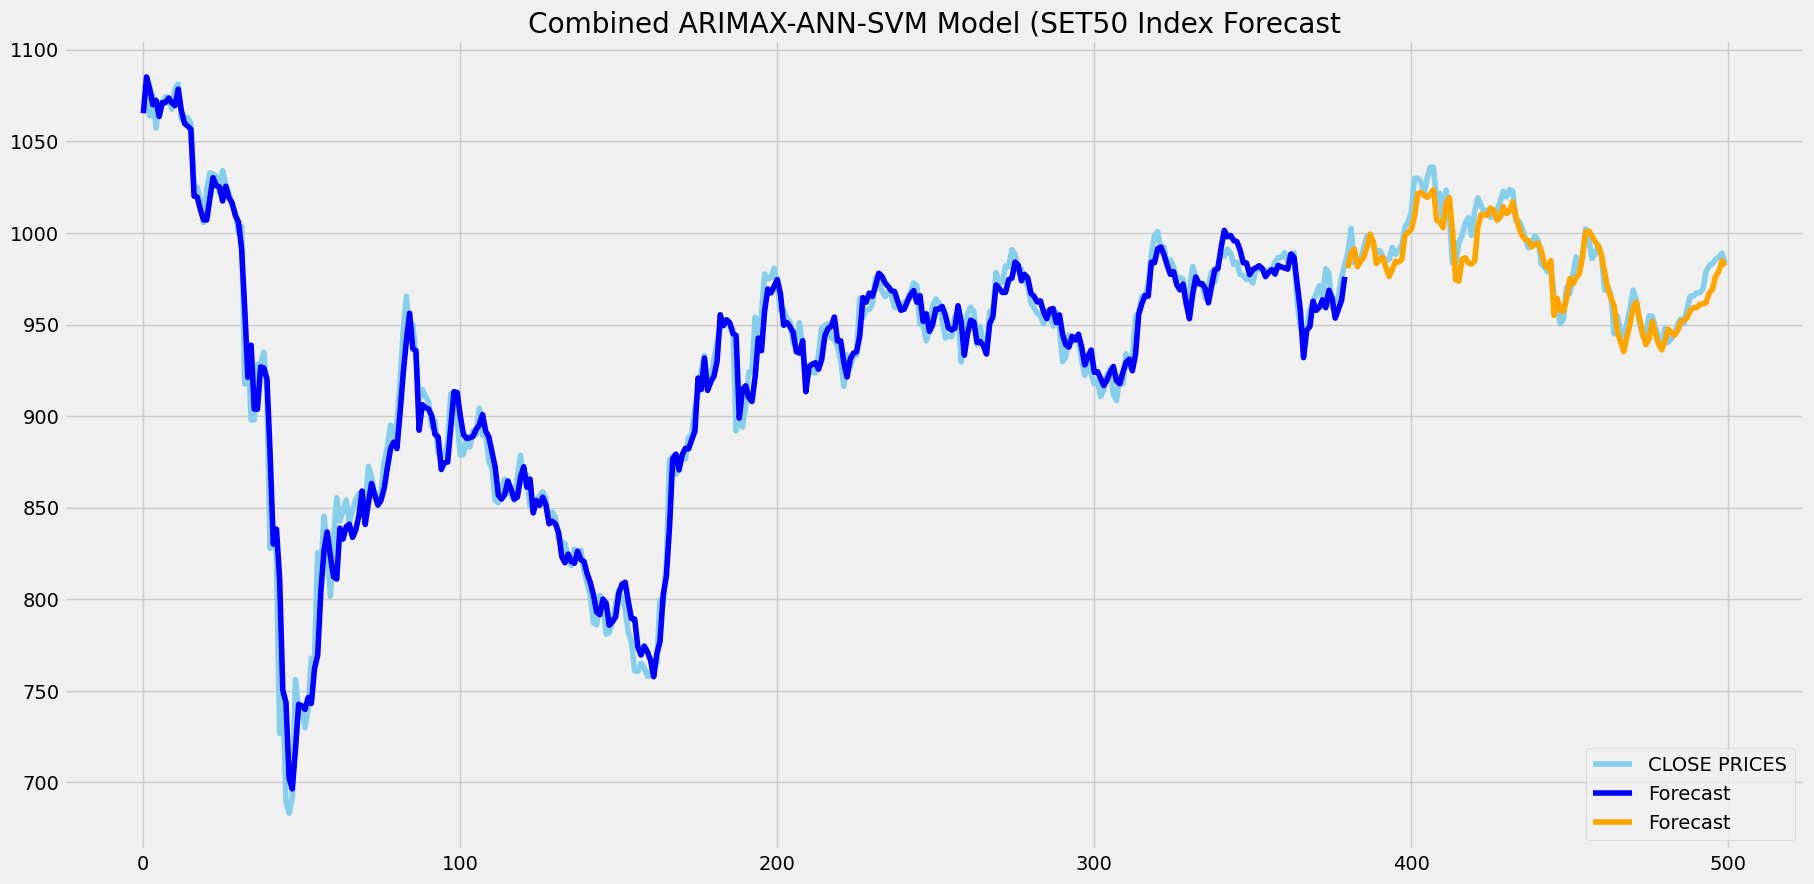

In [ ]:
merged_data1 = merged_data.reset_index()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data1['SET50'][:500].plot(label = 'CLOSE PRICES', color = 'skyblue')
merged_data1['Forecast_Combined'][:380].plot(label = 'Forecast', color = 'blue')
merged_data1['Forecast_Combined'][380:500].plot(label = 'Forecast', color = 'orange')

plt.legend(loc = 'lower right')
plt.title('Combined ARIMAX-ANN-SVM Model (SET50 Index Forecast')
plt.show()

In [ ]:
mape = MAPE(merged_data['SET50'][380:500], merged_data['Forecast_Combined'][380:500])
rmse = np.sqrt(mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_Combined'][380:500]))
mse = mean_squared_error(merged_data['SET50'][380:500], merged_data['Forecast_Combined'][380:500])
mae = mean_absolute_error(merged_data['SET50'][380:500], merged_data['Forecast_Combined'][380:500])
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

RMSE: 8.7704
MSE: 76.9202
MAE: 6.9568
MAPE: 0.7025


#BB with combinded Model

In [ ]:
#Forecast ARIMAX of Valuation
forecast_ARIMA_BB = results.forecast(steps=128,exog = X_val_)

In [ ]:
#Forecast SVR of Valuation
#{'C': 5, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
svm_best = SVR(kernel='linear', C=5, gamma='auto',
               epsilon=0.1)
svm_best.fit(X_train, y_train)
y_pred_svr_BB = svm_best.predict(X_val)

In [ ]:
import tensorflow as tf

seed = 7
tf.random.set_seed(seed)

# create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(50, input_dim=6, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
model.add(Dense(50, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 100, verbose=0)

#Forecast ANN of Valuation
y_pred_ann_BB = model.predict(X_val)
y_pred_ann_BB = y_pred_ann_BB.reshape(128,)

4/4 [==============================] - 0s 4ms/step


In [ ]:
#Forecast Combined of Valuation
combined_pred_BB = weights[0]*forecast_ARIMA_BB + weights[1]*y_pred_svr_BB + weights[2]*y_pred_ann_BB
merged_data['Forecast_Combined'][500:] = combined_pred_BB

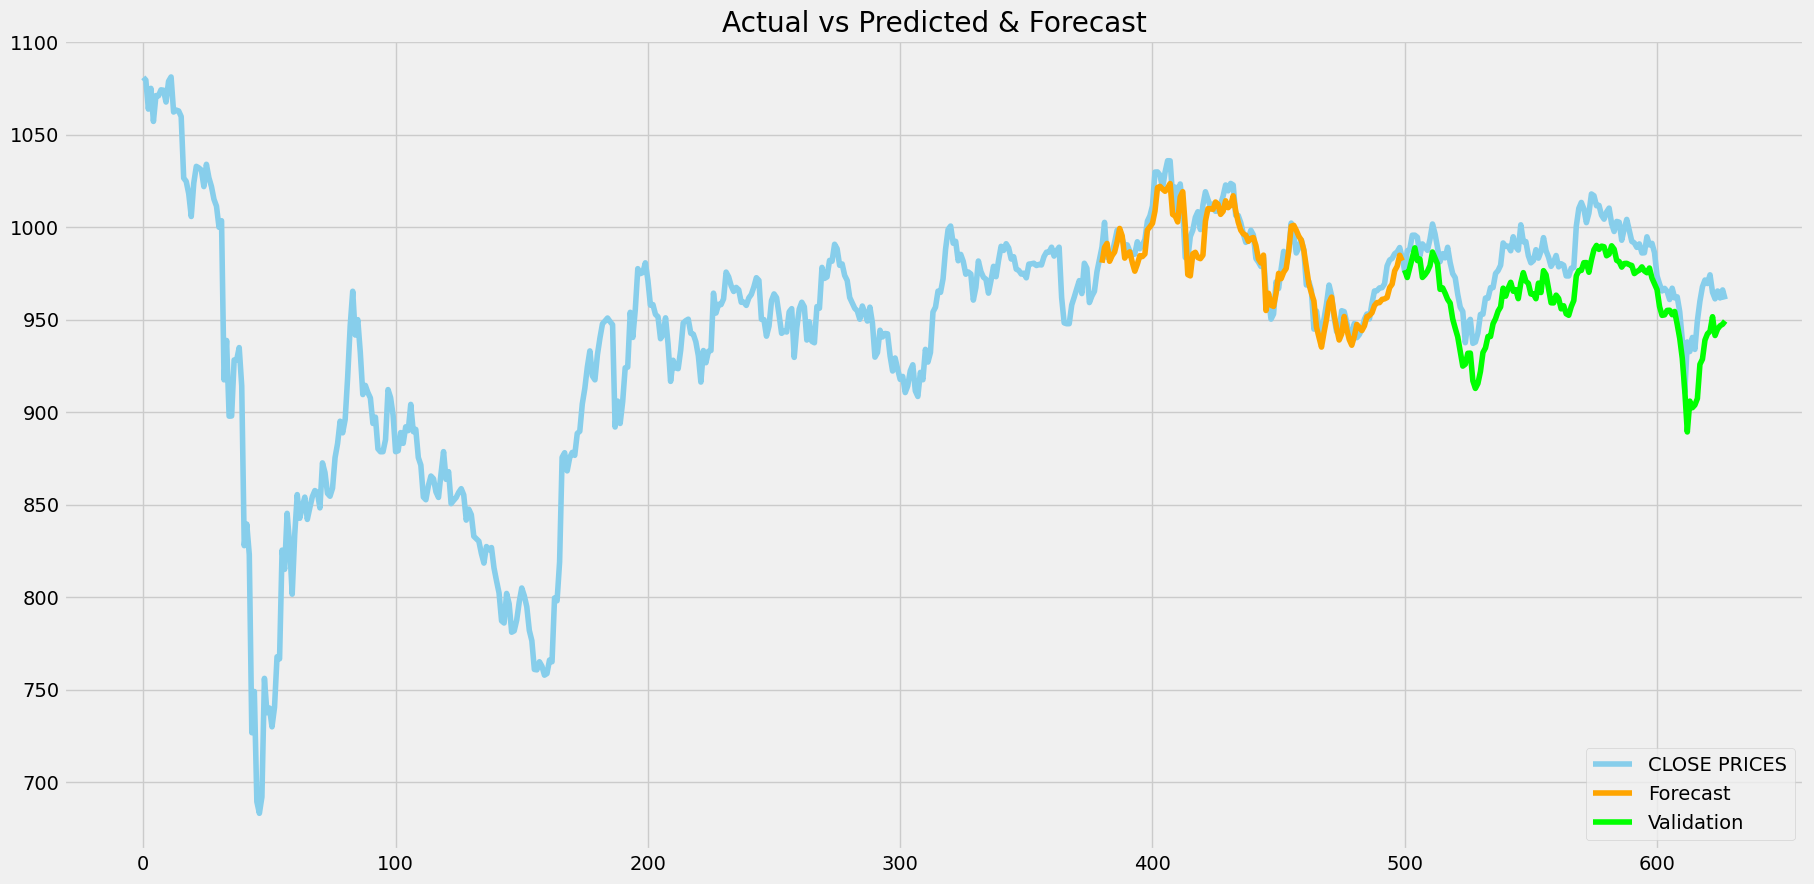

In [ ]:
merged_data1 = merged_data.reset_index()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data1['SET50'].plot(label = 'CLOSE PRICES', color = 'skyblue')
merged_data1['Forecast_Combined'][380:500].plot(label = 'Forecast', color = 'orange')
merged_data1['Forecast_Combined'][500:].plot(label = 'Validation', color = 'lime')

plt.legend(loc = 'lower right')
plt.title('Actual vs Predicted & Forecast')
plt.show()

In [ ]:
mape = MAPE(merged_data['SET50'][500:], merged_data['Forecast_Combined'][500:])
rmse = np.sqrt(mean_squared_error(merged_data['SET50'][500:], merged_data['Forecast_Combined'][500:]))
mse = mean_squared_error(merged_data['SET50'][500:], merged_data['Forecast_Combined'][500:])
mae = mean_absolute_error(merged_data['SET50'][500:], merged_data['Forecast_Combined'][500:])
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

RMSE: 21.5540
MSE: 464.5735
MAE: 19.9137
MAPE: 2.0342


In [ ]:
#Create Bollinger Band Signal on Best Model
merged_data['Forecast_Combined'][:380] = merged_data['SET50'][:380]
merged_data['sma_20'] = merged_data['Forecast_Combined'].rolling(window = 20).mean()

def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

merged_data['upper_bb'], merged_data['lower_bb'] = bb(merged_data['Forecast_Combined'], merged_data['sma_20'], 20)

def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0

    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)

    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(merged_data['Forecast_Combined'], merged_data['lower_bb'], merged_data['upper_bb'])


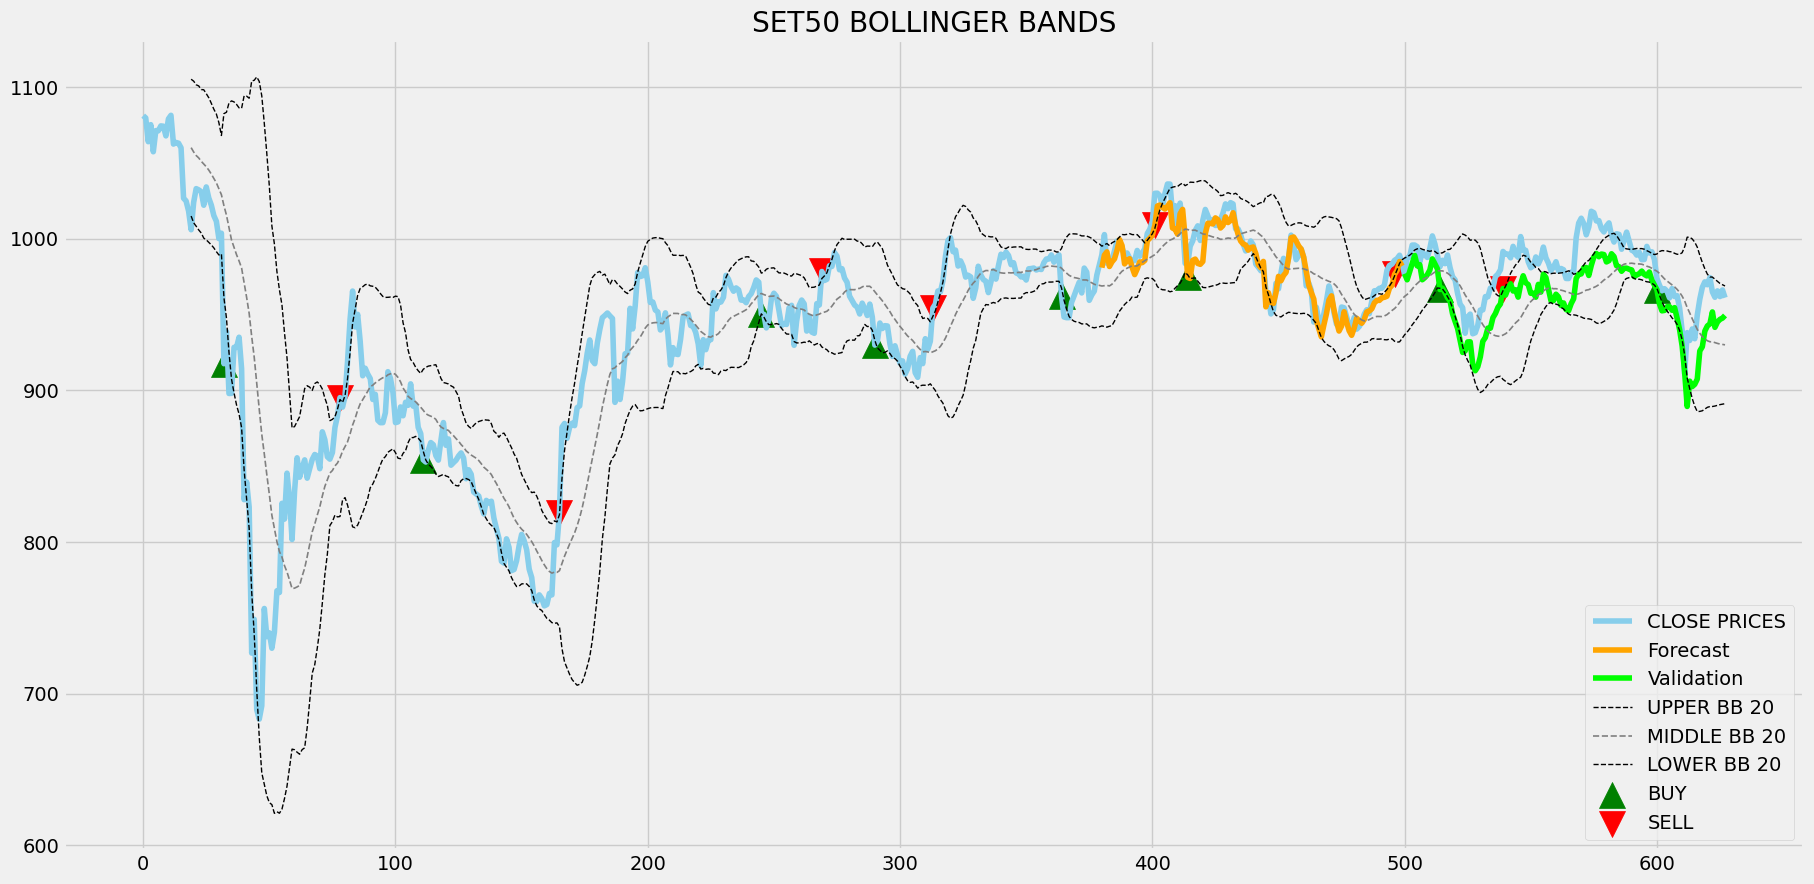

In [ ]:
merged_data1 = merged_data.reset_index()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data1['SET50'].plot(label = 'CLOSE PRICES', color = 'skyblue')
merged_data1['Forecast_Combined'][380:500].plot(label = 'Forecast', color = 'orange')
merged_data1['Forecast_Combined'][500:].plot(label = 'Validation', color = 'lime')

merged_data1['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
merged_data1['sma_20'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
merged_data1['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')

plt.scatter(merged_data1.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 350)
plt.scatter(merged_data1.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 350)
plt.legend(loc = 'lower right')
plt.title('SET50 BOLLINGER BANDS')
plt.show()

In [ ]:
#Profit Rate
position = []
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)

for i in range(len(merged_data['Forecast_Combined'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]

upper_bb = merged_data['upper_bb']
lower_bb = merged_data['lower_bb']
close_price = merged_data['Forecast_Combined']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(merged_data.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(merged_data.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)


buy_price, sell_price, bb_signal = implement_bb_strategy(merged_data['Forecast_Combined'], merged_data['lower_bb'], merged_data['upper_bb'])

merged_data_ret = pd.DataFrame(np.diff(merged_data['SET50'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

for i in range(len(merged_data_ret)):
    try:
        returns = merged_data_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass

bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/merged_data['SET50'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the BB strategy by investing $100k in SET50 : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the BB strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the BB strategy by investing $100k in SET50 : -10459.28
Profit percentage of the BB strategy : -11%


#BB & MA Real Data

In [ ]:
#Create Bollinger Band Signal on Real Data
merged_data_real = merged_data
merged_data_real['sma_20'] = merged_data_real['SET50'].rolling(window = 20).mean()

def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

merged_data_real['upper_bb'], merged_data_real['lower_bb'] = bb(merged_data_real['SET50'], merged_data_real['sma_20'], 20)

merged_data_real1 = merged_data_real.reset_index()

buy_price, sell_price, bb_signal = implement_bb_strategy(merged_data_real['SET50'], merged_data_real['lower_bb'], merged_data_real['upper_bb'])

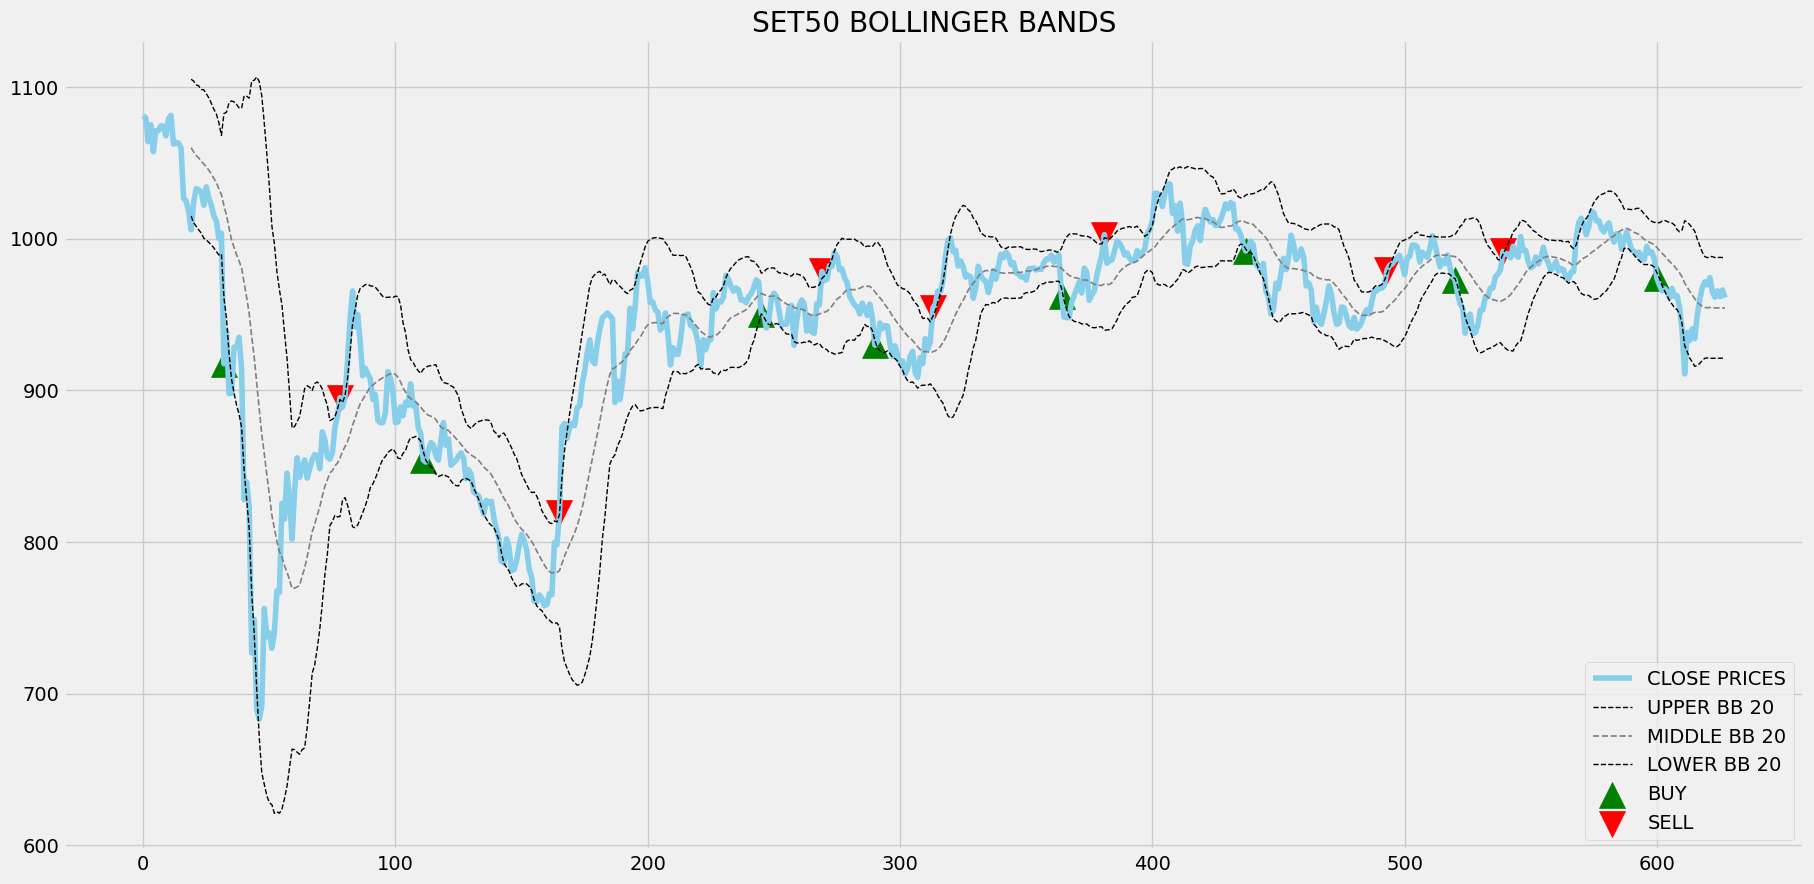

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data_real1['SET50'].plot(label = 'CLOSE PRICES', color = 'skyblue')

merged_data_real1['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
merged_data_real1['sma_20'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
merged_data_real1['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')

plt.scatter(merged_data_real1.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 350)
plt.scatter(merged_data_real1.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 350)
plt.legend(loc = 'lower right')
plt.title('SET50 BOLLINGER BANDS')
plt.show()

In [ ]:
#Profit Rate
buy_price, sell_price, bb_signal = implement_bb_strategy(merged_data_real['SET50'], merged_data_real['lower_bb'], merged_data_real['upper_bb'])

position = []
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)

for i in range(len(merged_data_real['SET50'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]

upper_bb = merged_data_real['upper_bb']
lower_bb = merged_data_real['lower_bb']
close_price = merged_data_real['SET50']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(merged_data_real.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(merged_data_real.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

merged_data_ret = pd.DataFrame(np.diff(merged_data_real['SET50'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

for i in range(len(merged_data_ret)):
    try:
        returns = merged_data_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass

bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/merged_data_real['SET50'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the BB strategy by investing $100k in SET50 : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the BB strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the BB strategy by investing $100k in SET50 : -13986.96
Profit percentage of the BB strategy : -14%


In [ ]:
#Create MA Signal on Real Data
!pip install pandas-ta
import pandas_ta as ta
merged_data['SMA 30'] = ta.sma(merged_data['SET50'],30)
merged_data['SMA 100'] = ta.sma(merged_data['SET50'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['SET50'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['SET50'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

merged_data['Buy_Signal_price'], merged_data['Sell_Signal_price'] = buy_sell(merged_data)

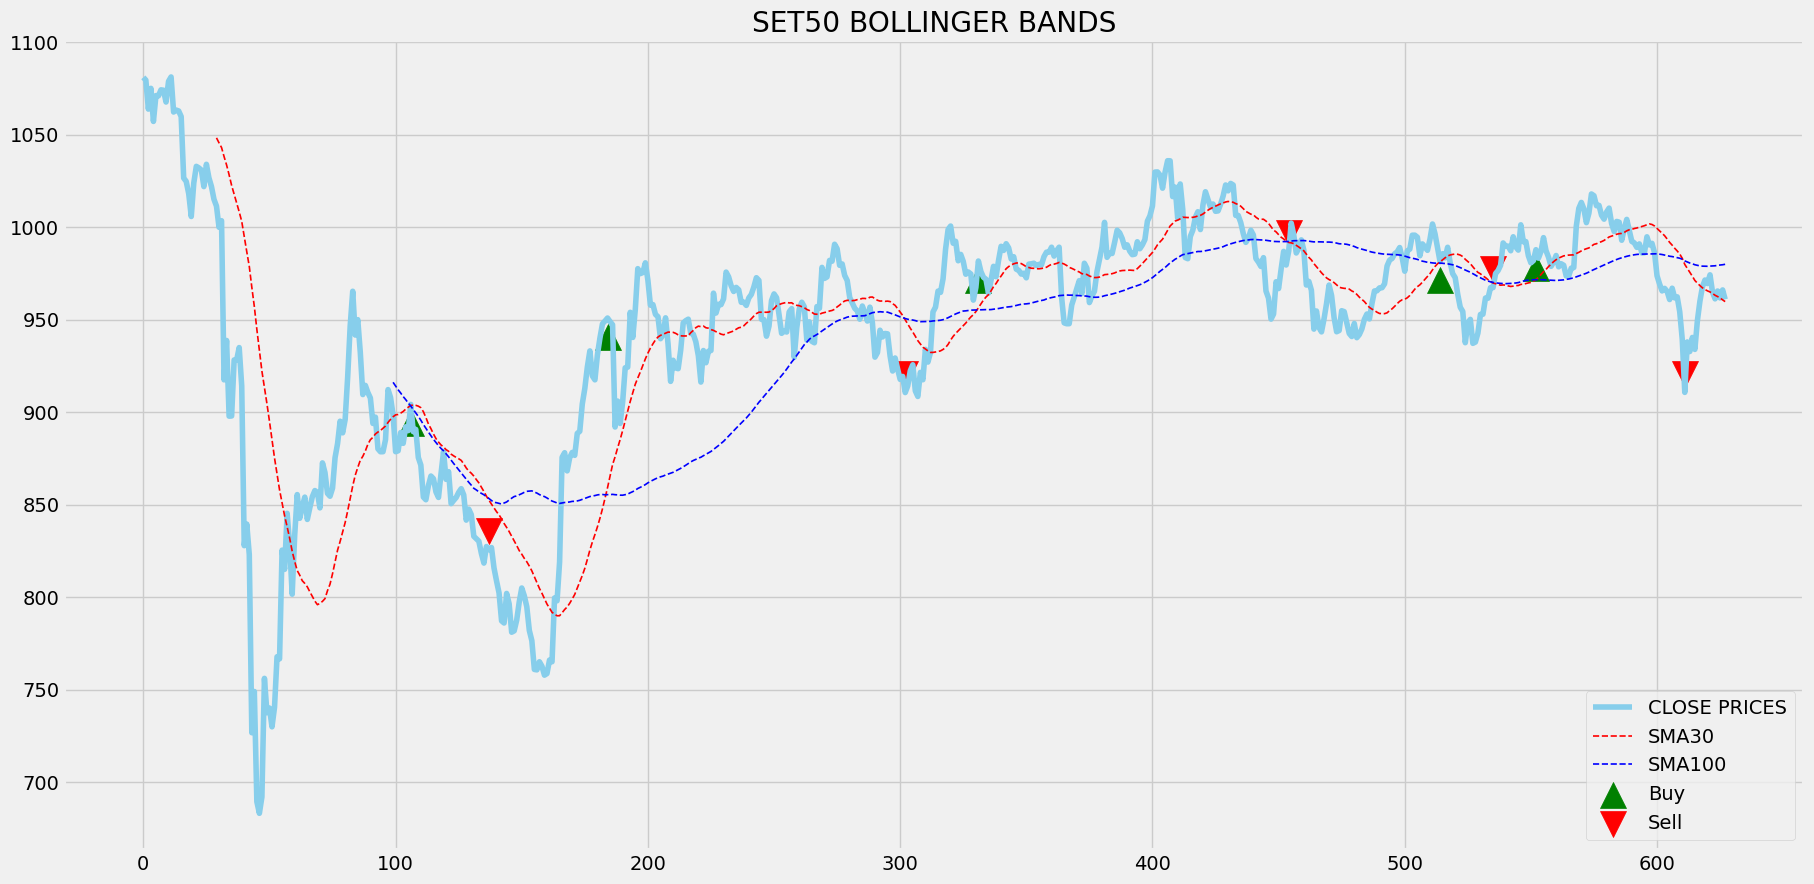

In [ ]:
#Plot MA Signal
merged_data1 = merged_data.reset_index()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

merged_data1['SET50'].plot(label = 'CLOSE PRICES', color = 'skyblue')

merged_data1['SMA 30'].plot(label = 'SMA30', linestyle = '--', linewidth = 1.2, color = 'red')
merged_data1['SMA 100'].plot(label = 'SMA100', linestyle = '--', linewidth = 1.2, color = 'blue')

plt.scatter(merged_data1.index , merged_data1['Buy_Signal_price']-10 , label = 'Buy' , marker = '^', color = 'green',s=350)
plt.scatter(merged_data1.index , merged_data1['Sell_Signal_price']+10 , label = 'Sell' , marker = 'v', color = 'red',s=350 )
plt.legend(loc = 'lower right')
plt.title('SET50 BOLLINGER BANDS')
plt.show()